In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, make_scorer, roc_auc_score, roc_curve, average_precision_score, precision_recall_curve, classification_report, confusion_matrix
from sklearn.utils import resample
from sklearn.pipeline import Pipeline

from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
# import nbimporter, import_ipynb

import sys
import os

# Add the parent directory to sys.path
sys.path.append(os.path.abspath('../'))

import utils

In [3]:
!ls ../

breast-cancer  fashion-mnist  __pycache__  uci-adult  utils.ipynb  utils.py


In [4]:
# Loading the datasets
X_train = pd.read_csv('./breast-cancer-processed-data/X_train.csv')
y_train = pd.read_csv('./breast-cancer-processed-data/y_train.csv') 
X_val = pd.read_csv('./breast-cancer-processed-data/X_val.csv')
y_val = pd.read_csv('./breast-cancer-processed-data/y_val.csv')
X_test = pd.read_csv('./breast-cancer-processed-data/X_test.csv')
y_test = pd.read_csv('./breast-cancer-processed-data/y_test.csv')

In [5]:
y_train = y_train.squeeze()
y_val = y_val.squeeze()
y_test = y_test.squeeze()

In [6]:
# X_train, X_val, X_test, y_train, y_val, y_test

# Step 1: Apply PCA
# Choose the number of components, e.g., 2 for visualization
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_val_pca = pca.transform(X_val)
X_test_pca = pca.transform(X_test)

# Step 2: Train KNN Classifier
# Choose the number of neighbors, e.g., 3
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_pca, y_train)

# Step 3: Predict and Evaluate the model
y_val_pred = knn.predict(X_val_pca)
val_accuracy = accuracy_score(y_val, y_val_pred)

print(f"Validation Accuracy: {val_accuracy:.4f}")

print(confusion_matrix(y_val, y_val_pred))
print(classification_report(y_val, y_val_pred))

Validation Accuracy: 0.9560
[[33  1]
 [ 3 54]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.94        34
           1       0.98      0.95      0.96        57

    accuracy                           0.96        91
   macro avg       0.95      0.96      0.95        91
weighted avg       0.96      0.96      0.96        91



In [7]:
# Create a pipeline that first applies PCA and then KNN
pipe = Pipeline([
    ('pca', PCA()),
    ('knn', KNeighborsClassifier())
])

# Define the parameter grid to search
param_grid = {
    'pca__n_components': [2, 5, 10, 15, 20, 25, 30],  # Example values
    'knn__n_neighbors': [1, 3, 5, 7, 9, 11, 13]      # Example values
}

# Create a GridSearchCV object
grid_search = GridSearchCV(pipe, param_grid, cv=5, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and the corresponding score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

Fitting 5 folds for each of 49 candidates, totalling 245 fits
[CV] END ............knn__n_neighbors=1, pca__n_components=2; total time=   0.0s
[CV] END ............knn__n_neighbors=1, pca__n_components=2; total time=   0.0s
[CV] END ............knn__n_neighbors=1, pca__n_components=2; total time=   0.0s
[CV] END ............knn__n_neighbors=1, pca__n_components=2; total time=   0.0s
[CV] END ............knn__n_neighbors=1, pca__n_components=2; total time=   0.0s
[CV] END ............knn__n_neighbors=1, pca__n_components=5; total time=   0.0s
[CV] END ............knn__n_neighbors=1, pca__n_components=5; total time=   0.0s
[CV] END ............knn__n_neighbors=1, pca__n_components=5; total time=   0.0s
[CV] END ............knn__n_neighbors=1, pca__n_components=5; total time=   0.0s
[CV] END ............knn__n_neighbors=1, pca__n_components=5; total time=   0.0s
[CV] END ...........knn__n_neighbors=1, pca__n_components=10; total time=   0.0s
[CV] END ...........knn__n_neighbors=1, pca__n_

In [10]:
# now same pipeline with the best parameters
pca = PCA(n_components=20)
X_train_pca = pca.fit_transform(X_train)
X_val_pca = pca.transform(X_val)
X_test_pca = pca.transform(X_test)

# Step 2: Train KNN Classifier
# Choose the number of neighbors, e.g., 3
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train_pca, y_train)

# Step 3: Predict and Evaluate the model
y_val_pred = knn.predict(X_val_pca)
val_accuracy = accuracy_score(y_val, y_val_pred)

print(f"Validation Accuracy: {val_accuracy:.4f}")

print(confusion_matrix(y_val, y_val_pred))
print(classification_report(y_val, y_val_pred))

Validation Accuracy: 0.9890
[[33  1]
 [ 0 57]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        34
           1       0.98      1.00      0.99        57

    accuracy                           0.99        91
   macro avg       0.99      0.99      0.99        91
weighted avg       0.99      0.99      0.99        91



Test Accuracy: 0.9649
[[38  4]
 [ 0 72]]
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        42
           1       0.95      1.00      0.97        72

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114



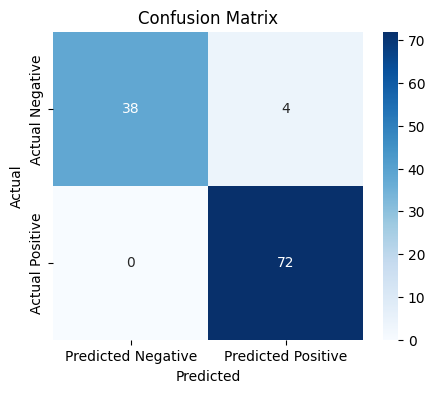

In [13]:
# Step 4: Evaluate the model on test data
# Use the KNN model to predict on the test set
y_test_pred = knn.predict(X_test_pca)

# Generating the confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy:.4f}")
print(cm)
print(classification_report(y_test, y_test_pred))


# Plotting the confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', 
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()